# 000. Morning Pipeline
- This gathers single-run daily data and extracts updated data from yesterday 
- Type: Pipeline
- Run Frequency: Daily (Morning)
- Created: 1/1/2025
- Updated: 5/29/2025

### Imports

In [1]:
%run "C:\Users\james\Documents\MLB\Code\U1. Imports.ipynb"
%run "C:\Users\james\Documents\MLB\Code\U2. Utilities.ipynb"
%run "C:\Users\james\Documents\MLB\Code\U3. Classes.ipynb"
%run "C:\Users\james\Documents\MLB\Code\U4. Datasets.ipynb"
%run "C:\Users\james\Documents\MLB\Code\U5. Models.ipynb"

### Games

Replace yesterday's and generate today's

In [2]:
%%time
historic_game_df = pd.read_csv(os.path.join(baseball_path, "game_df.csv"))
recent_game_df = create_games(yesterdaysdate, todaysdate, team_dict)
historic_game_df = historic_game_df[~historic_game_df['date'].astype(str).isin([yesterdaysdate, todaysdate])]
all_game_df = pd.concat([historic_game_df, recent_game_df], axis=0)
all_game_df.to_csv(os.path.join(baseball_path, "game_df.csv"), index=False)

CPU times: total: 156 ms
Wall time: 435 ms


### A01. DraftKings

In [3]:
draftables_only = False

In [4]:
print("A01. DraftKings:")
print(f"todaysdate: {todaysdate}")
print(f"todaysdate_dash: {todaysdate_dash}")
print(f"yesterdaysdate: {yesterdaysdate}")
print(f"draftables_only: {draftables_only}")

A01. DraftKings:
todaysdate: 20250627
todaysdate_dash: 2025-06-27
yesterdaysdate: 20250626
draftables_only: False


In [5]:
%run "C:\Users\james\Documents\MLB\Code\A01. DraftKings.ipynb"

Saved 129896
Saved 129894
Saved 129653
CPU times: total: 484 ms
Wall time: 956 ms
CPU times: total: 203 ms
Wall time: 2 s
178079927
contest-standings-178079927
['contest-standings-178079927.zip']
C:\Users\james\Downloads\contest-standings-178079927.zip
Zip file unpacked successfully!
178079920
contest-standings-178079920
['contest-standings-178079920.zip']
C:\Users\james\Downloads\contest-standings-178079920.zip
Zip file unpacked successfully!
178079930
contest-standings-178079930
['contest-standings-178079930.zip']
C:\Users\james\Downloads\contest-standings-178079930.zip
Zip file unpacked successfully!
178079925
contest-standings-178079925
['contest-standings-178079925.csv']
C:\Users\james\Downloads\contest-standings-178079925.csv
File copied successfully!
178079924
contest-standings-178079924
['contest-standings-178079924.csv']
C:\Users\james\Downloads\contest-standings-178079924.csv
File copied successfully!
178079877
contest-standings-178079877
['contest-standings-178079877.zip']
C

### A02. MLB API

In [6]:
year = int(todaysdate[:4])

In [7]:
print("A02. MLB API:")
print(f"year: {year}")

A02. MLB API:
year: 2025


In [8]:
%run "C:\Users\james\Documents\MLB\Code\A02. MLB API.ipynb"

This is a large query, it may take a moment to complete


100%|██████████| 101/101 [04:41<00:00,  2.78s/it]


CPU times: total: 7min 7s
Wall time: 4min 48s


### A03. Steamer

In [9]:
print("A03. Steamer:")

A03. Steamer:


In [10]:
%run "C:\Users\james\Documents\MLB\Code\A03. Steamer.ipynb"

Moved 'C:\Users\james\Downloads\steamer_pitchers_weekly_log.csv' to 'C:\Users\james\Documents\MLB\Database\A03. Steamer'.
Moved 'C:\Users\james\Downloads\steamer_hitters_weekly_log.csv' to 'C:\Users\james\Documents\MLB\Database\A03. Steamer'.
Moved 'C:\Users\james\Downloads\steamer_pitchers.csv' to 'C:\Users\james\Documents\MLB\Database\A03. Steamer'.
Moved 'C:\Users\james\Downloads\steamer_hitters.csv' to 'C:\Users\james\Documents\MLB\Database\A03. Steamer'.


### A04. Bullpens

In [11]:
game_df = all_game_df[all_game_df['date'].astype(str) == todaysdate].reset_index(drop=True)

In [12]:
print("A04. Bullpens:")
print("game_df")

A04. Bullpens:
game_df


In [13]:
%run "C:\Users\james\Documents\MLB\Code\A04. Bullpens.ipynb"

CPU times: total: 219 ms
Wall time: 48.3 s


### A05. Rosters

In [14]:
game_df = all_game_df[(all_game_df['date'].astype(str) >= yesterdaysdate) & (all_game_df['date'].astype(str) <= todaysdate)].reset_index(drop=True)

In [15]:
print("A05. Rosters:")
print("game_df (yesterday and today)")

A05. Rosters:
game_df (yesterday and today)


In [16]:
%run "C:\Users\james\Documents\MLB\Code\A05. Rosters.ipynb"

CPU times: total: 281 ms
Wall time: 18.1 s
CPU times: total: 109 ms
Wall time: 2.76 s


### A06. Weather

In [17]:
game_df = all_game_df[(all_game_df['date'].astype(str) >= yesterdaysdate) & (all_game_df['date'].astype(str) <= todaysdate)].reset_index(drop=True)

In [18]:
print("A06. Weather:")
print(f"todaysdate: {todaysdate}")
print(f"game_df (yesterday and today)")

A06. Weather:
todaysdate: 20250627
game_df (yesterday and today)


In [19]:
%run "C:\Users\james\Documents\MLB\Code\A06. Weather.ipynb"

20250626
20250627
CPU times: total: 594 ms
Wall time: 11.1 s


### A07. Projections

In [20]:
scrape_slates = True

In [21]:
print("A07. Projections:")
print(f"todaysdate: {todaysdate}")
print(f"scrape_slates: {scrape_slates}")

A07. Projections:
todaysdate: 20250627
scrape_slates: True


In [22]:
%run "C:\Users\james\Documents\MLB\Code\A07. Projections.ipynb"

Scraping slates: True


### A08. Odds

In [23]:
game_df = all_game_df[(all_game_df['date'].astype(str) >= yesterdaysdate) & (all_game_df['date'].astype(str) <= todaysdate)].reset_index(drop=True)

In [24]:
print("A08. Odds:")
print("game_df (yesterday and today)")

A08. Odds:
game_df (yesterday and today)


In [25]:
%run "C:\Users\james\Documents\MLB\Code\A08. Odds.ipynb"

### A09. Contest Guides

In [26]:
game_df = all_game_df[(all_game_df['date'].astype(str) >= yesterdaysdate) & (all_game_df['date'].astype(str) <= todaysdate)].reset_index(drop=True)

In [27]:
print("A09. Contest Guides:")
print("game_df (yesterday and today)")

A09. Contest Guides:
game_df (yesterday and today)


In [28]:
%run "C:\Users\james\Documents\MLB\Code\A09. Contest Guides.ipynb"

20250626
178079927
178079920
178079930
178079925
178079924
178079877
178079878
178079876
178079875
178079879
178079928
20250627
178100636
178100638
178100641
178100634
178100637
178100619
178100616
178099783
178100617
178100618
178100560
178100558
178100561
178100563
178100565
178100620


### A10. Player Results

In [29]:
game_df = all_game_df[all_game_df['date'].astype(str) == yesterdaysdate].reset_index(drop=True)

In [30]:
print("A10. Player Results:")
print("game_df (yesterday)")

A10. Player Results:
game_df (yesterday)


In [31]:
%run "C:\Users\james\Documents\MLB\Code\A10. Player Results.ipynb"

777351
777354
777356
777353
777350
777348
777344
777347
777352
CPU times: total: 453 ms
Wall time: 1.78 s


### M01. Park and Weather Factors

In [32]:
print("M01. Park and Weather Factors:")

M01. Park and Weather Factors:


CPU times: total: 1min 57s
Wall time: 55.9 s
CPU times: total: 5.42 s
Wall time: 21.7 s
55289/55289 ━━━━━━━━━━━━━━━━━━━━ 36s 648us/step


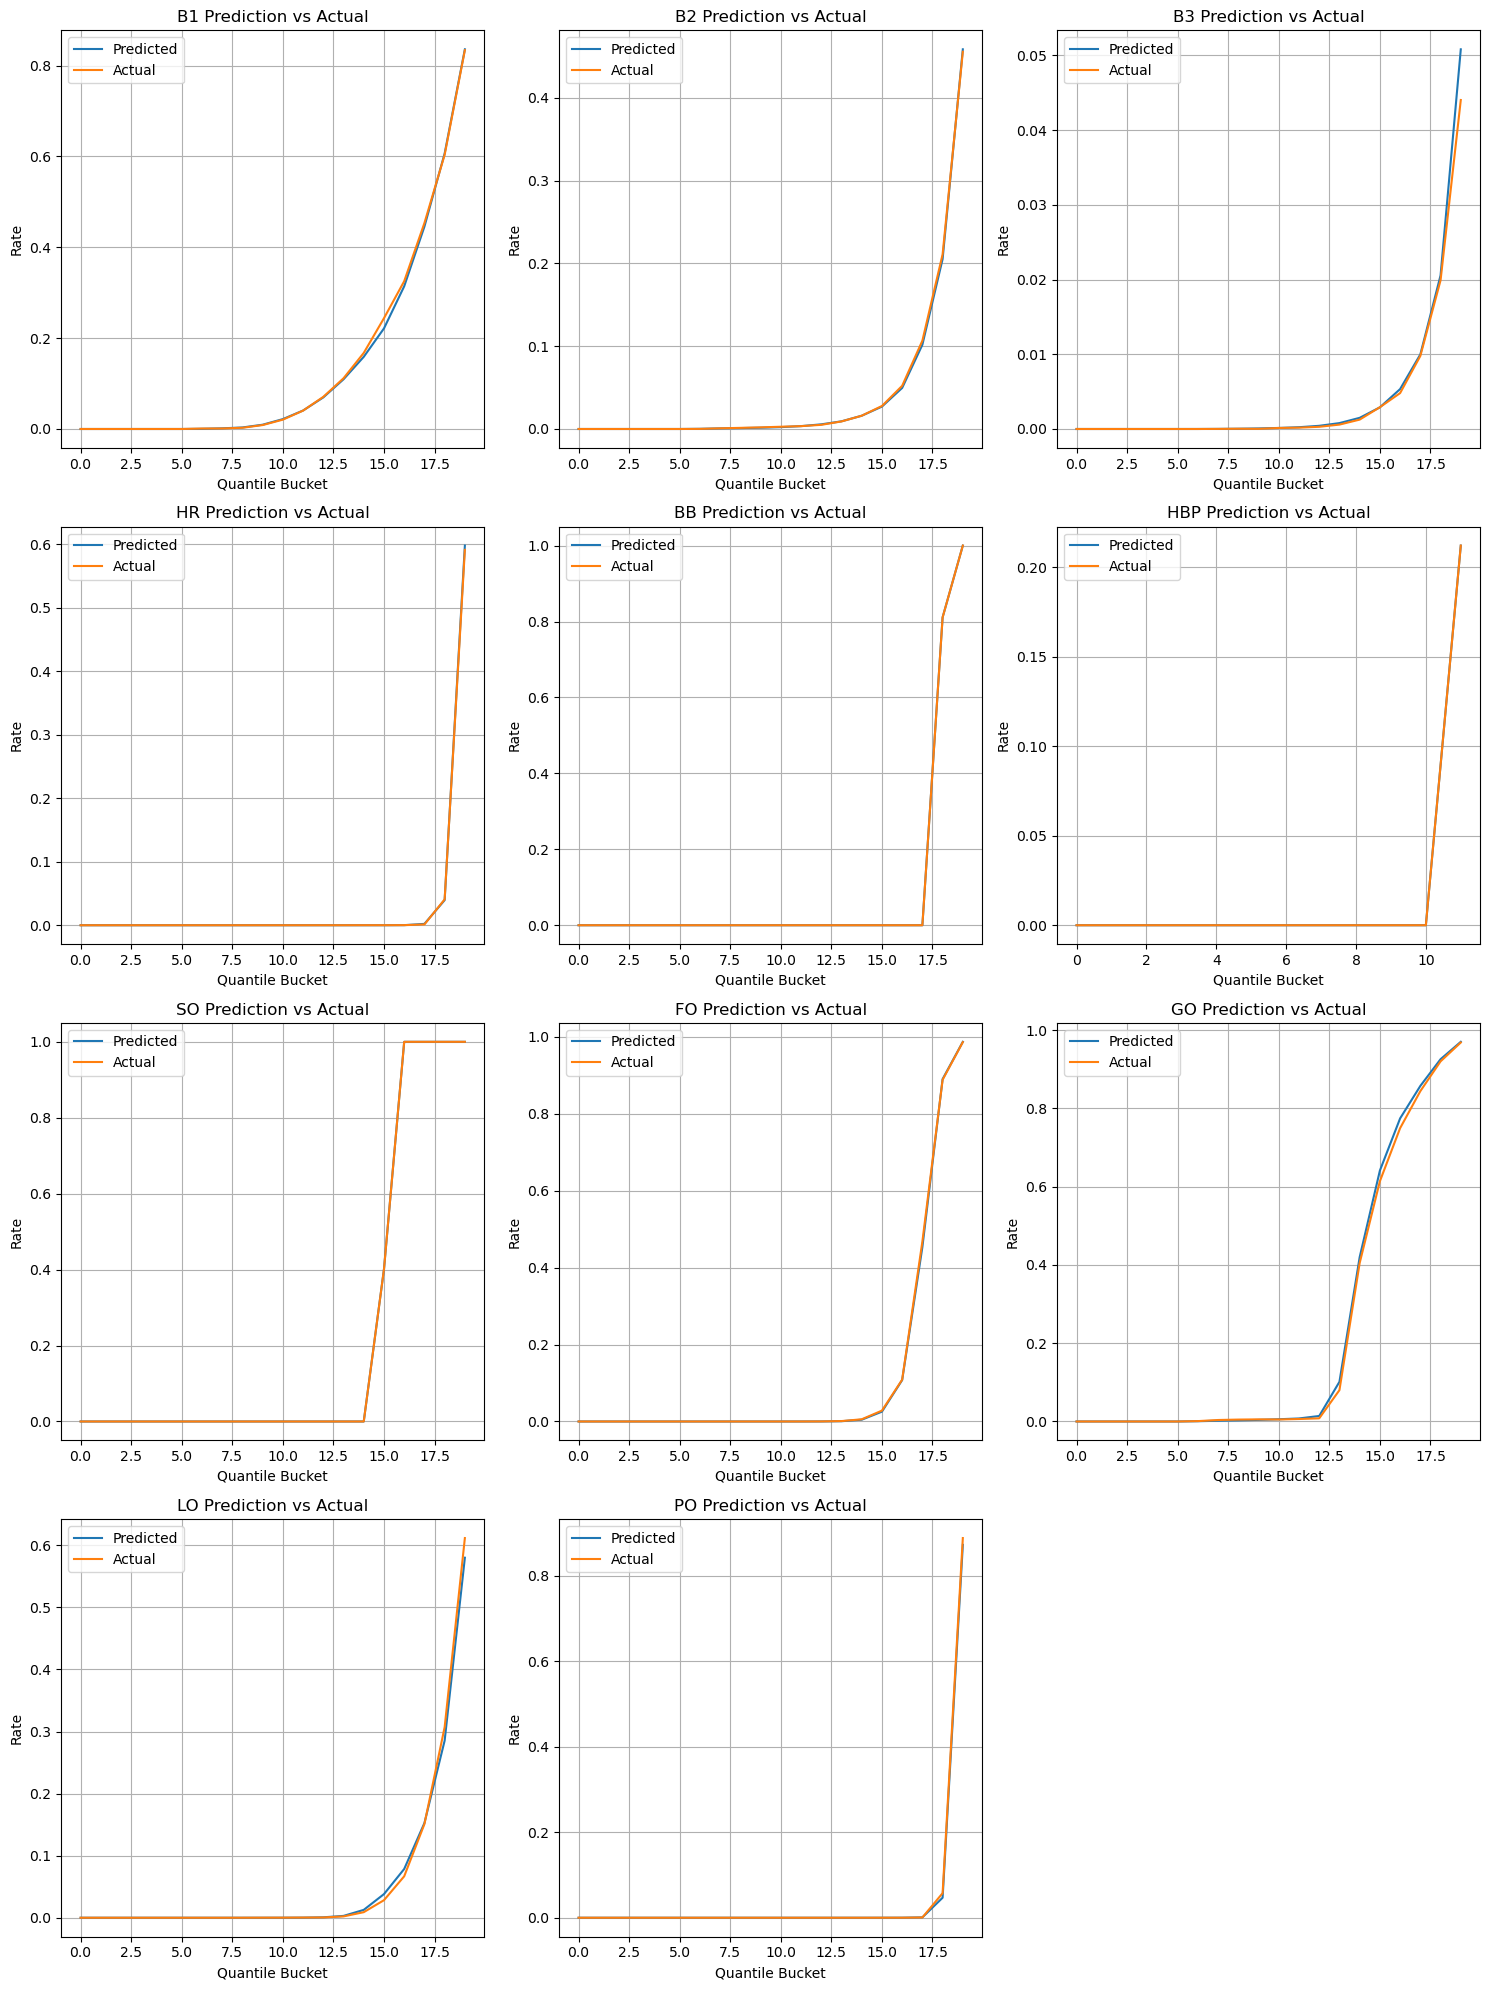

CPU times: total: 0 ns
Wall time: 0 ns


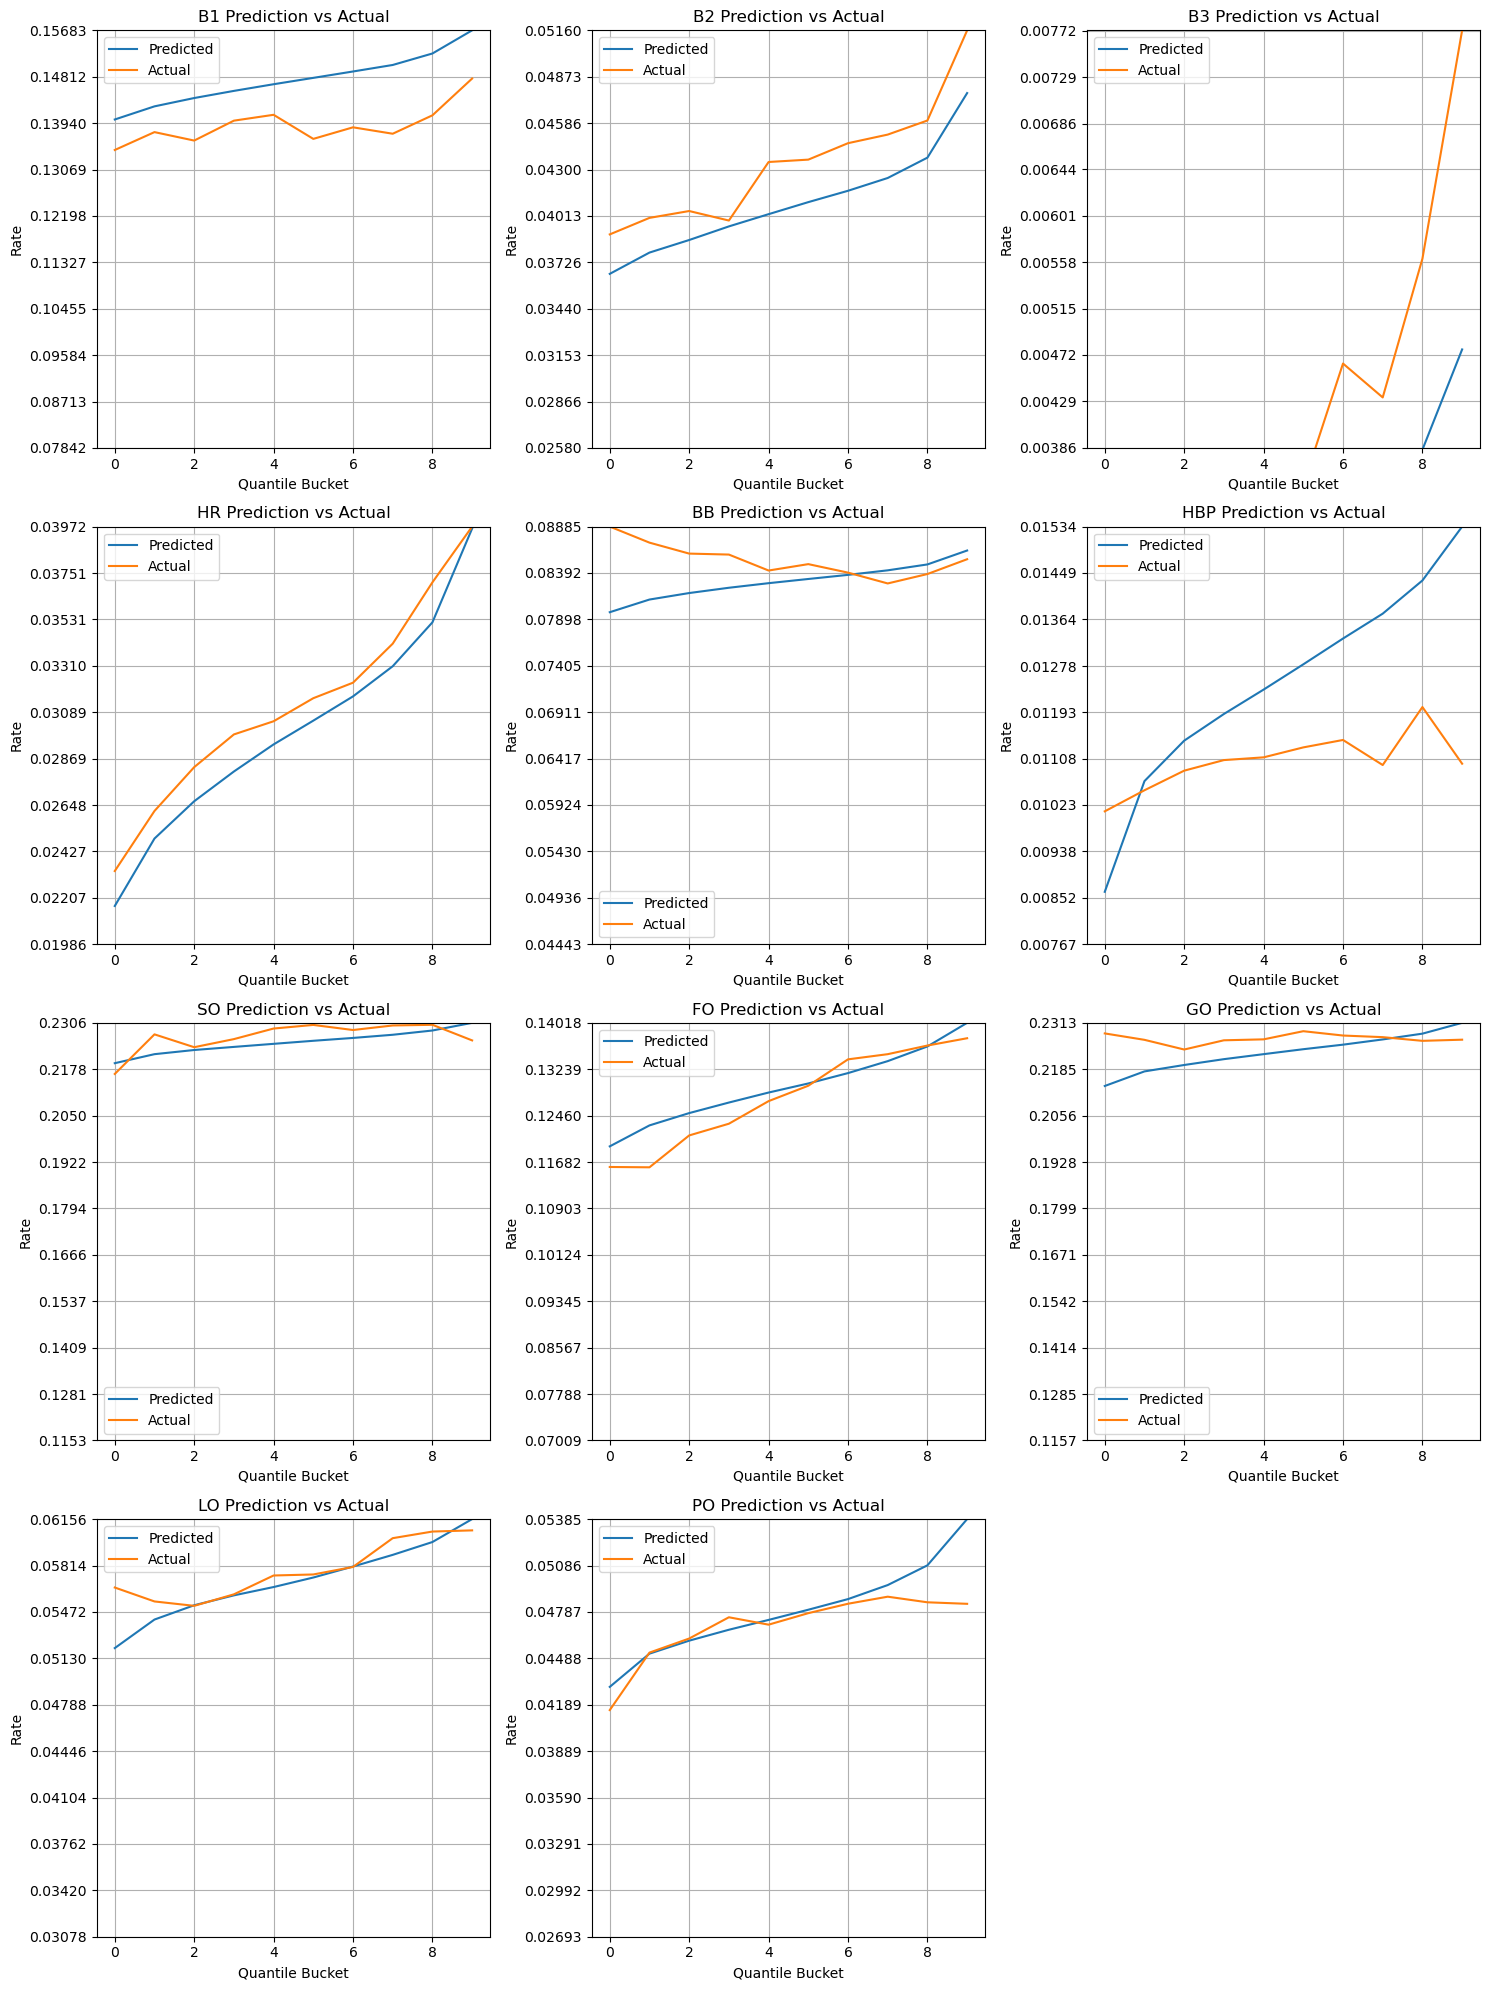

CPU times: total: 39min 28s
Wall time: 7min 37s


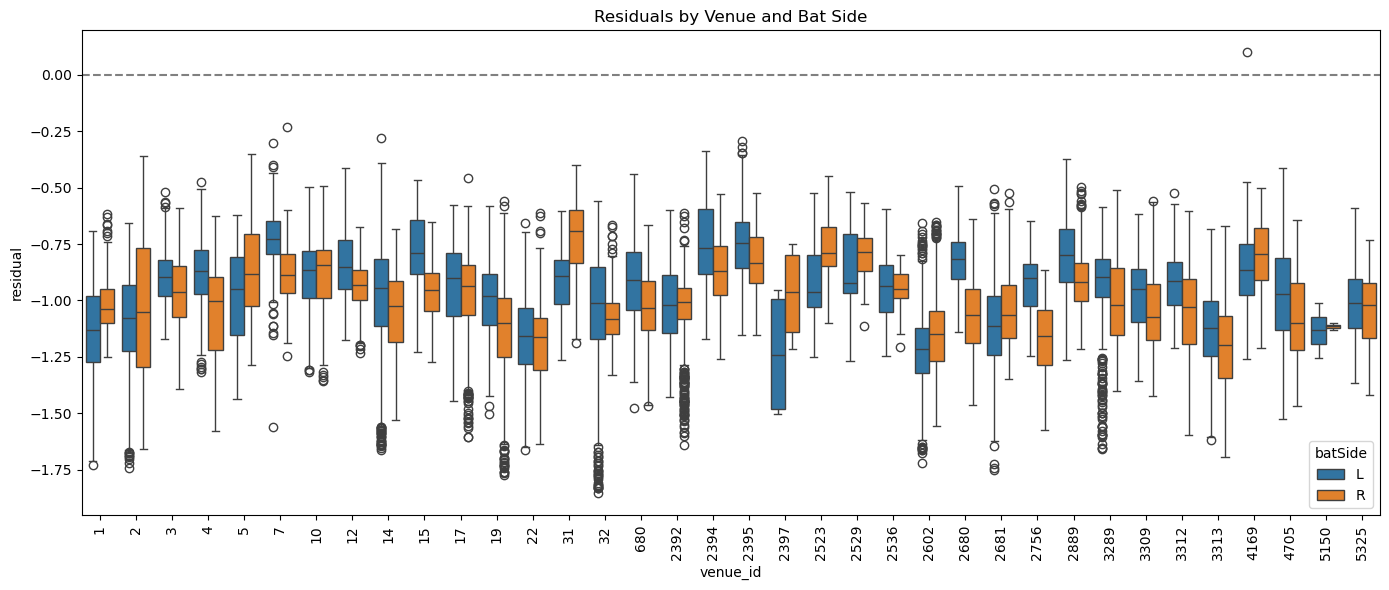

Short took 18.22 seconds
Long took 24.82 seconds
CPU times: total: 4min 19s
Wall time: 4min 21s


In [33]:
%run "C:\Users\james\Documents\MLB\Code\M01. Park and Weather Factors.ipynb"

### Restart Kernel

In [34]:
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}